# Fraud detection

Using logictic regression to predict fraud.

## Parameters

In [1]:
DATA = './input/ieee-fraud-detection.zip'

## Data
### 1. Imports

In [2]:
# System
from zipfile import ZipFile
import os

# Data manipulation and analysis
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### 2. Loading

In [3]:
dfs = {}
with ZipFile(DATA) as zip:
    for data in zip.infolist():
        print('> Processing :', data.filename, end='')
        filename = os.path.splitext(data.filename)[0]
        dfs[filename] = pd.read_csv(zip.open(data.filename))
        print(' - done!')

> Processing : test_identity.csv - done!
> Processing : test_transaction.csv - done!
> Processing : train_identity.csv - done!
> Processing : sample_submission.csv - done!
> Processing : train_transaction.csv - done!


In [4]:
dfs.keys()

dict_keys(['test_identity', 'test_transaction', 'train_identity', 'sample_submission', 'train_transaction'])

### 3. Exploration

In [5]:
dfs['train_identity'].head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
dfs['train_transaction'].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dfs['train_identity'].shape

(144233, 41)

In [8]:
dfs['train_transaction'].shape

(590540, 394)

In [9]:
df_train = pd.merge(dfs['train_transaction'], dfs['train_identity'], on='TransactionID', how='left')

In [10]:
df_train.shape

(590540, 434)

In [11]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [12]:
print(df_train.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

#### Visualizing missing data

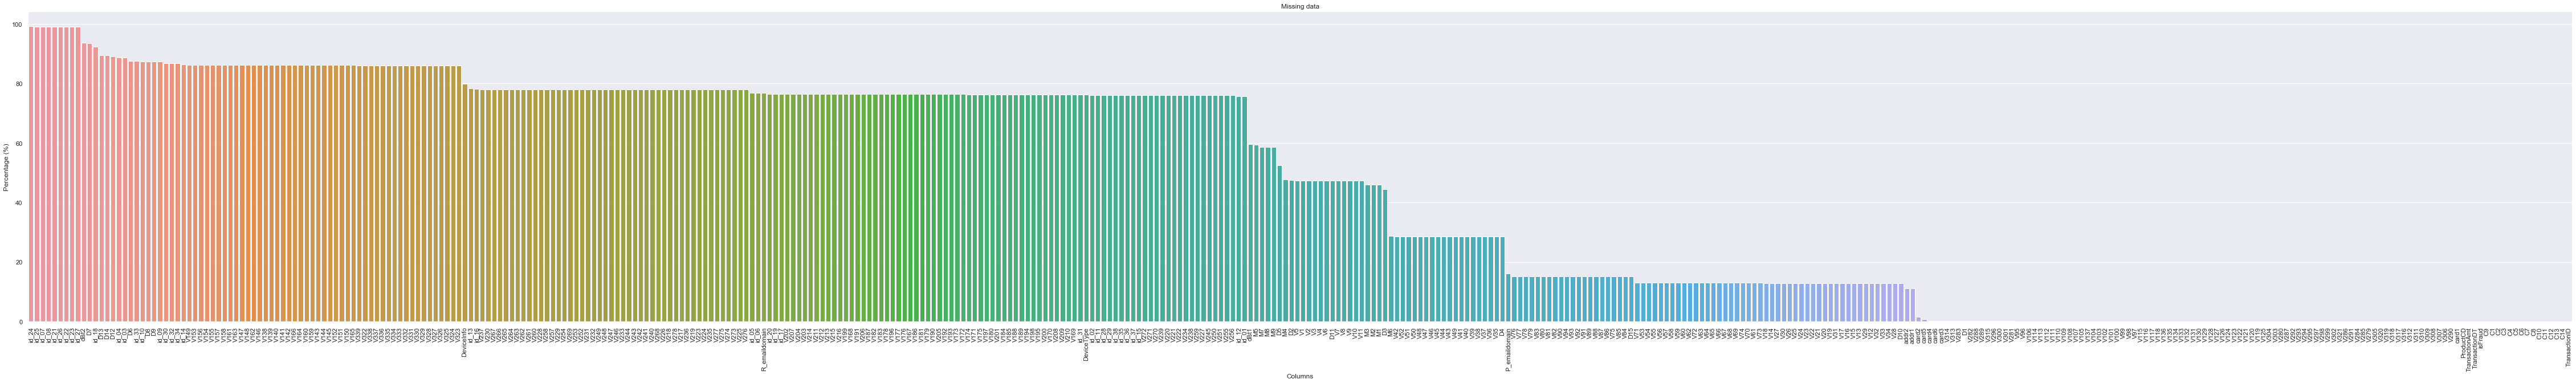

In [13]:
missing_data_columns = df_train.isnull().sum().sort_values(ascending=False);
missing_data_percentage = missing_data_columns / len(df_train) * 100;

plt.figure(figsize=(80,10))
sns.barplot(x=missing_data_columns.index, y=missing_data_percentage)
plt.title('Missing data')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.show()

### 4. Preparation

#### a. Remove all columns with more than 75% missing data

In [14]:
missing_data_percentage = df_train.isnull().sum() / len(df_train) * 100
missing_data_percentage > 75

TransactionID     False
isFraud           False
TransactionDT     False
TransactionAmt    False
ProductCD         False
                  ...  
id_36              True
id_37              True
id_38              True
DeviceType         True
DeviceInfo         True
Length: 434, dtype: bool

In [15]:
missing_data_percentage[missing_data_percentage > 75]

dist2            93.628374
R_emaildomain    76.751617
D6               87.606767
D7               93.409930
D8               87.312290
                   ...    
id_36            76.126088
id_37            76.126088
id_38            76.126088
DeviceType       76.155722
DeviceInfo       79.905510
Length: 208, dtype: float64

In [16]:
df_train_step_1_clean = df_train[missing_data_percentage[missing_data_percentage < 75].index]

In [17]:
df_train.shape

(590540, 434)

In [18]:
df_train_step_1_clean.shape

(590540, 226)

In [19]:
df_train_step_1_clean.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_train = df_train_step_1_clean

#### b. Convert categorical variables into dummy/indicator variables

In [21]:
df_train_objects = df_train[df_train.select_dtypes(include=['object']).columns]
df_train_objects

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,visa,debit,NaN,T,T,T,M0,T,F,F,F,T
590536,W,mastercard,debit,gmail.com,T,F,F,M0,F,T,F,F,F
590537,W,mastercard,debit,gmail.com,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,W,mastercard,debit,aol.com,T,T,T,M0,F,T,NaN,NaN,NaN


In [22]:
dummy1 = pd.get_dummies(df_train_objects['P_emaildomain'])
dummy1.head()

,aim.com,anonymous.com,aol.com,att.net,bellsouth.net,cableone.net,centurylink.net,cfl.rr.com,charter.net,comcast.net,...,web.de,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dummy2 = pd.get_dummies(df_train_objects['card4'])
dummy2.head()

,american express,discover,mastercard,visa
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


In [24]:
df_train_converted_objects = pd.get_dummies(df_train_objects)
df_train_converted_objects.head()

,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_train_converted_objects.shape

(590540, 91)

In [26]:
df_train_step_2_clean = df_train.drop(df_train_objects, axis=1)
df_train_step_2_clean.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_train_step_2_clean = pd.concat([df_train_step_2_clean, df_train_converted_objects], axis=1)
df_train_step_2_clean.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,...,1,0,0,1,0,0,0,0,0,0
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0,1,0,1,0,0,0,0,0,0
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,1,0,1,0,1,0,1,0,1,0
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0,1,1,0,0,0,0,0,0,0
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_train_step_2_clean.shape

(590540, 304)

In [29]:
df_train = df_train_step_2_clean

#### c. Replace missing data (NaN)

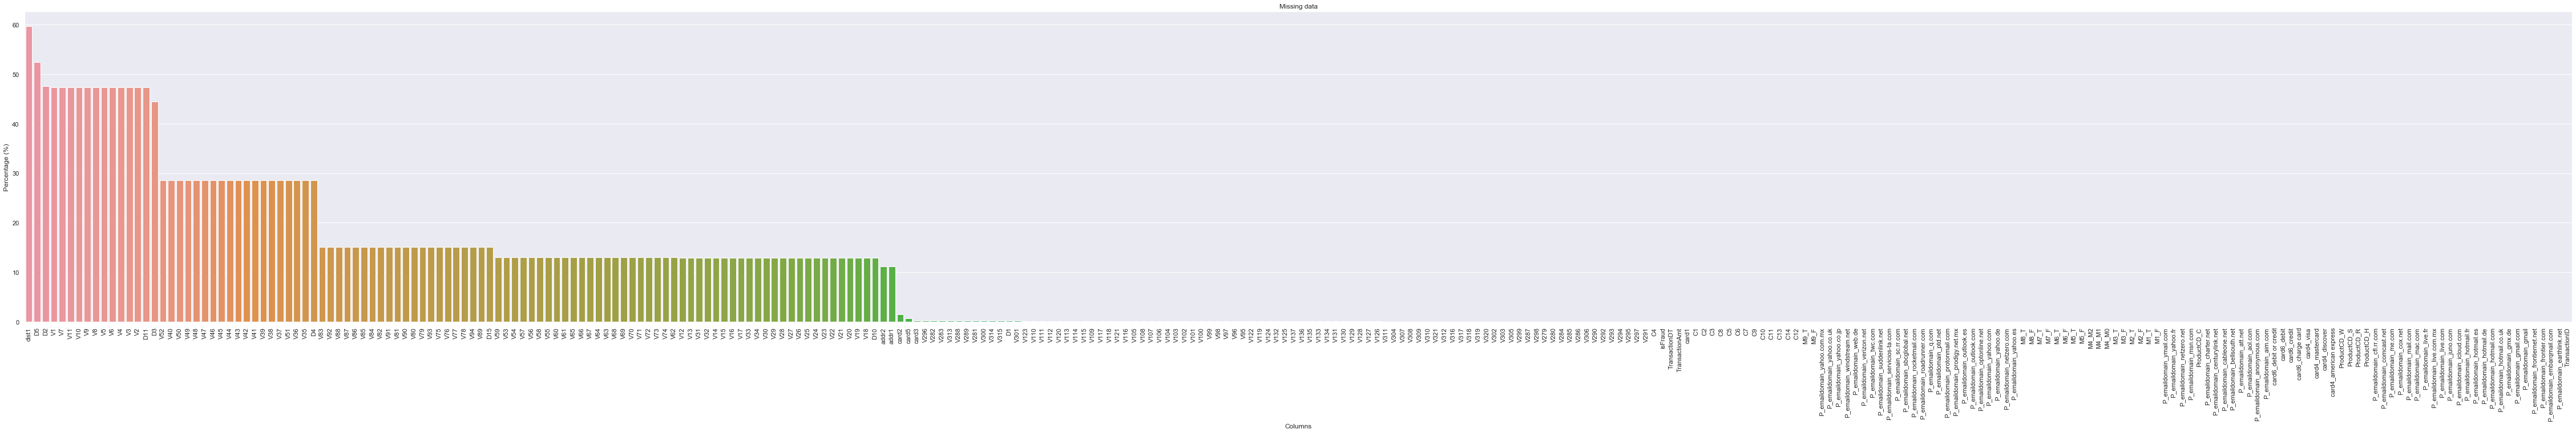

In [30]:
missing_data_set = df_train.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(80,10))
sns.barplot(x=missing_data_set.index,
            y=missing_data_set / len(df_train) * 100)
plt.title('Missing data')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.show()

In [31]:
missing_data_set[missing_data_set > 0]

dist1    352271
D5       309841
D2       280797
V1       279287
V7       279287
          ...  
V293         12
V294         12
V295         12
V297         12
V291         12
Length: 194, dtype: int64

In [32]:
df_train['dist1'].isnull().sum()

352271

In [33]:
df_train['dist1'].mean()

118.50218030881064

In [34]:
df_train['dist1'].median()

8.0

In [35]:
df_train['dist1'].mode()

0    0.0
dtype: float64

In [36]:
df_train['V291']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
590535    1.0
590536    1.0
590537    1.0
590538    2.0
590539    1.0
Name: V291, Length: 590540, dtype: float64

In [37]:
for column in missing_data_set[missing_data_set > 0].index:
    print('>', column)
    print(df_train[column].isnull().sum(), df_train[column].mean(), df_train[column].median(), df_train[column].mode())
    # Arbitrarily choose to replace the missing value with the median. Don't want to add new values with the mean.
    df_train[column].fillna(df_train[column].median(), inplace=True)

> dist1
352271 118.50218030881064 8.0 0    0.0
dtype: float64
> D5
309841 42.33596485915518 10.0 0    0.0
dtype: float64
> D2
280797 169.56323145317248 97.0 0    0.0
dtype: float64
> V1
279287 0.9999453820525425 1.0 0    1.0
dtype: float64
> V7
279287 1.072869980369667 1.0 0    1.0
dtype: float64
> V11
279287 0.47898654792082324 0.0 0    0.0
dtype: float64
> V10
279287 0.4639152072429824 0.0 0    0.0
dtype: float64
> V9
279287 1.0415289169903583 1.0 0    1.0
dtype: float64
> V8
279287 1.0277041506427247 1.0 0    1.0
dtype: float64
> V5
279287 0.8769907438643162 1.0 0    1.0
dtype: float64
> V6
279287 1.0456863066380082 1.0 0    1.0
dtype: float64
> V4
279287 0.8464560984151157 1.0 0    1.0
dtype: float64
> V3
279287 1.0780747494803262 1.0 0    1.0
dtype: float64
> V2
279287 1.0452043835722065 1.0 0    1.0
dtype: float64
> D11
279287 146.6214654959149 43.0 0    0.0
dtype: float64
> D3
262878 28.343347718075332 8.0 0    0.0
dtype: float64
> V52
168969 0.18269520436652426 0.0 0    0.0
dty

314 1.8272288919837485 0.0 0    0.0
dtype: float64
> V101
314 0.8892492028477227 0.0 0    0.0
dtype: float64
> V100
314 0.27350370874885216 0.0 0    0.0
dtype: float64
> V99
314 0.8949859884179958 0.0 0    0.0
dtype: float64
> V98
314 0.06198473127242785 0.0 0    0.0
dtype: float64
> V97
314 1.7189330866481654 0.0 0    0.0
dtype: float64
> V96
314 3.0051895375669657 0.0 0    0.0
dtype: float64
> V95
314 1.038019334966606 0.0 0    0.0
dtype: float64
> V122
314 1.0017586483821452 1.0 0    1.0
dtype: float64
> V119
314 1.0007285344935668 1.0 0    1.0
dtype: float64
> V124
314 1.0929745555092456 1.0 0    1.0
dtype: float64
> V132
314 103.51318849235776 0.0 0    0.0
dtype: float64
> V125
314 1.0504145869548274 1.0 0    1.0
dtype: float64
> V137
314 26.365089844530424 0.0 0    0.0
dtype: float64
> V136
314 38.82119582327327 0.0 0    0.0
dtype: float64
> V135
314 17.25013217816419 0.0 0    0.0
dtype: float64
> V133
314 204.88915980030455 0.0 0    0.0
dtype: float64
> V134
314 145.972327546355

In [38]:
df_train.isnull().values.any()

False

## Modeling

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [40]:
x_full_df = df_train.drop(["isFraud"], axis=1)
y_full_df = df_train["isFraud"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_full_df, y_full_df, test_size=0.30)

In [42]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lr.score(X_test, y_test)

0.9649981372980662

## Results

+ Good accuracy
+ Prediction could be improved further by using regression techniques to predict missing values, instead of using the median.
